In [ ]:
"""
Purpose: To merge 


"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 18:05:40,977 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 18:05:40,979 - settings - Setting database.user to celiib
INFO - 2021-04-25 18:05:40,979 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 18:05:40,992 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 18:05:40,993 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 18:05:41,004 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 18:05:41,354 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 18:05:41,357 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 18:05:41,358 - settings - Setting database.user to celiib
INFO - 2021-04-25 18:05:41,358 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 18:05:41,359 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 18:05:41,359 - settings - Setting database.user to celiib
INFO - 2021-04-25 18:05:41,359 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 18:05:41,360 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 18:05:41,780 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 18:05:43,576 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 18:05:43,578 - settings - Setting database.user to celiib
INFO - 2021-04-25 18:05:43,579 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 18:05:43,582 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 18:05:44,023 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru

# Downloading the Neuron

In [5]:
segment_id = 864691135771629819
minnie.Decomposition() & f"segment_id = {segment_id}"

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),multiplicity the number of somas found for this base segment,decomposition,n_vertices number of vertices,n_faces number of faces,n_not_processed_soma_containing_meshes the number of meshes with somas that were not processed,n_error_limbs the number of limbs that are touching multiple somas or 1 soma in multiple places,n_same_soma_multi_touching_limbs number of limbs that touch the same soma multiple times,n_multi_soma_touching_limbs number of limbs that touch multiple somas,n_somas number of soma meshes detected,n_limbs,n_branches,max_limb_n_branches,skeletal_length,max_limb_skeletal_length,median_branch_length gives information on average skeletal length to next branch point,width_median median width from mesh center without spines removed,width_no_spine_median median width from mesh center with spines removed,width_90_perc 90th percentile for width without spines removed,width_no_spine_90_perc 90th percentile for width with spines removed,n_spines,spine_density n_spines/ skeletal_length,spines_per_branch,skeletal_length_eligible the skeletal length for all branches searched for spines,n_spine_eligible_branches the number of branches that were checked for spines because passed width threshold,spine_density_eligible n_spines/skeletal_length_eligible,spines_per_branch_eligible n_spines/n_spine_eligible_branches,total_spine_volume the sum of all spine volume,spine_volume_median median of the spine volume for those spines with able to calculate volume,spine_volume_density total_spine_volume/skeletal_length,spine_volume_density_eligible total_spine_volume/skeletal_length_eligible,spine_volume_per_branch_eligible total_spine_volume/n_spine_eligible_branches,run_time the amount of time to run (seconds)
864691135771629819,0,0.25,30.00,7,0,1,=BLOB=,352052,723537,0,0,0,0,1,6,112,70,4364849.778204389,2452912.000291832,25335.027,81.722,81.722,435.659,431.544,685,0.0001569355269499779,6.116071428571429,2265521.214,45,0.0003023586783328174,15.222,310685952341.2506,258247154.2305997,71179.07101697793,137136.63346930398,6904132274.250013,2676.4404


In [6]:
neuron_obj = du.fetch_neuron_obj_manual(segment_id,border_validation=True)

Decompressing Neuron in minimal output mode...please wait


# Filtering Using the Current Function

In [35]:
import proofreading_utils as pru
(filt_neuron,
 return_synapse_df_revised,
return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=False)


--- Working on filter 0:
function = axon_on_dendrite_merges
function __name__ = filter_away_axon_on_dendrite_merges
function arguments = {'use_pre_existing_axon_labels': True}



--- Working on filter 1:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'offset': 1500, 'comparison_distance': 2000, 'worst_case_match_threshold': 65, 'width_diff_max': None, 'width_diff_perc': 60, 'match_threshold': 45, 'angle_buffer': 15, 'max_degree_to_resolve': 6, 'match_method': 'best_match'}


limb_branch_dict_to_cancel = {}

--- Working on filter 2:
function = axon_webbing_t_merges
function __name__ = filter_away_webbing_t_merges
function arguments = {'child_width_maximum': 75, 'parent_width_maximum': 75, 'axon_only': True, 'error_if_web_is_none': True, 'web_size_threshold': 120, 'web_size_type': 'ray_trace_median', 'web_above_threshold': True}


limb_branch_dict_to_cancel = {}

--- Working on filter 3:
function = thick_t_merge
function __na


--- Working on filter 4:
function = double_back_and_width_change
function __name__ = filter_away_large_double_back_or_width_changes
function arguments = {'perform_double_back_errors': True, 'skip_double_back_errors_for_axon': False, 'width_jump_threshold': 250, 'running_width_jump_method': True, 'double_back_axon_like_threshold': 145, 'double_back_threshold': 120, 'allow_axon_double_back_angle_with_top': 39, 'allow_axon_double_back_angle_with_top_width_min': 140, 'skeletal_length_to_skip': 4000, 'comparison_distance': 3000, 'perform_width_errors': True, 'perform_axon_width_errors': False}


limb_branch_dict_to_cancel = {}

--- Working on filter 5:
function = axon_fork_divergence
function __name__ = filter_away_small_axon_fork_divergence
function arguments = {'divergence_threshold_mean': 165}


limb_branch_dict_to_cancel = {}



 ---- Total time for applying filter: 34.88973927497864 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synap

Segment Id = 864691135771629819
Postsyn counts:
TP:1465
TN:3
FP:2
FN:0
Presyn counts:
TP:56
TN:158
FP:2
FN:66


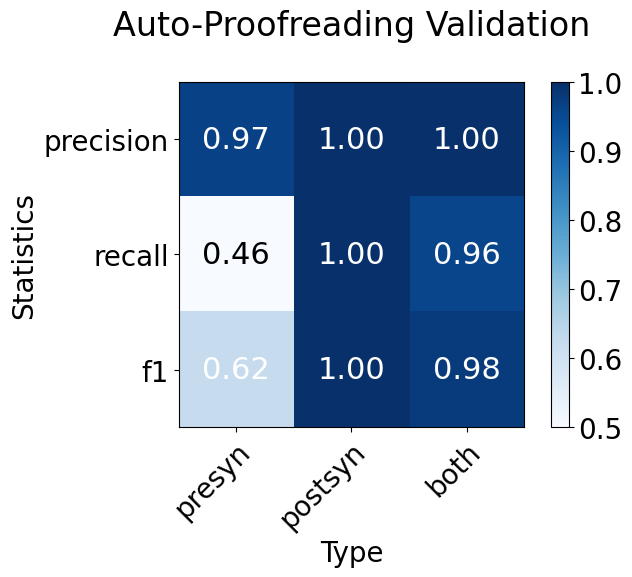

In [36]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [37]:
vu.plot_validation_synapses(segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Creating the Thick T Filter

In [10]:
filt_neuron

In [27]:
import axon_utils as au
import numpy as np
import neuron_searching as ns
import error_detection as ed

[autoreload of error_detection failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/usr/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/usr/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/meshAfterParty/meshAfterParty/error_detection.py", line 2222, in <module>
    def thick_t_errors_limb_branch_dict(neuron_obj = filt_neuron,
NameError: name 'filt_neuron' is not defined
]


In [30]:
ed.thick_t_errors_limb_branch_dict(filt_neuron,
                               plot_two_downstream_thin_axon_limb_branch = False,
                            plot_wide_angled_children = False,
                            plot_thick_t_crossing_limb_branch = False,
                            plot_t_error_limb_branch = True,
                            verbose = True)

two_downstream_thin_axon_limb_branch = {'L1': array([ 1,  6,  9, 10, 16, 35, 39, 44, 49, 52])}
wide_angled_children= {'L1': array([16])}
thick_t_crossing_limb_branch= {'L1': array([16])}
t_error_limb_branch= {'L1': array([13, 14])}
plotting plot_t_error_limb_branch

 Working on visualization type: mesh


{'L1': array([13, 14])}


--- Working on filter 0:
function = thick_t_merge
function __name__ = filter_away_thick_t_merge
function arguments = {}


limb_branch_dict_to_cancel = {'L1': array([13, 14])}


Branches Requested to Remove (WITH disconnect effect)

 Working on visualization type: mesh





 ---- Total time for applying filter: 11.50359296798706 -----

--- Finished Part 1: Filtering Neuron -----
Apply the presyn non_error
For presyn: # valid synapses = 58, # error synapses  = 232, # error presyns = 8
For postsyn: # valid synapses = 1467, # error synapses  = 3, # error presyns = 0

--- Finished Part 2: Filtering Synapses -----
Synapsse Results:
Total Number of Synapses = 1760
n_valid_syn_ids_presyn = 58
n_errored_syn_ids_presyn = 232
n_valid_syn_ids_postsyn = 1467
n_errored_syn_ids_postsyn = 3

--- Finished Part 3: Generating Validation Dataframe -----
Segment Id = 864691135771629819
Postsyn counts:
TP:1465
TN:3
FP:2
FN:0
Presyn counts:
TP:56
TN:158
FP:2
FN:66


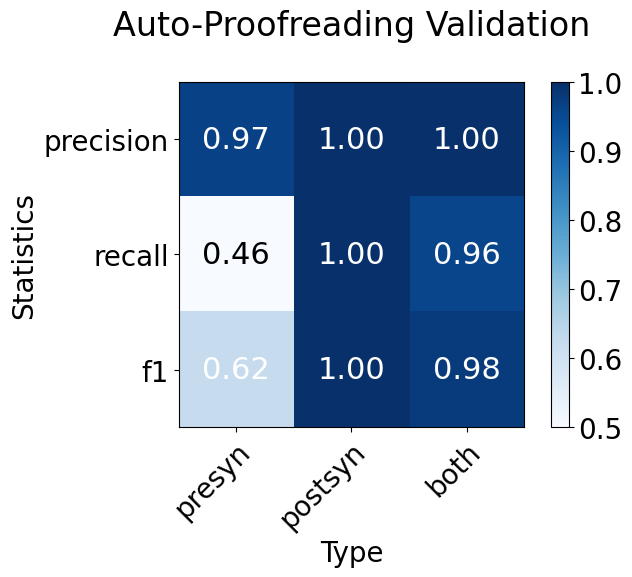

In [32]:
import proofreading_utils as pru
(filt_neuron_2,
 return_synapse_df_revised_2,
return_validation_df_revised_2) =  vu.filtered_neuron_score(neuron_obj = filt_neuron,   
                        filter_list = pru.v4_exc_filters(),
                        verbose = True,
                        plot_score=True)